# Import Necessary Libraries

In [76]:
import warnings
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv(r'./data/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [79]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


In [81]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [82]:
df.index

RangeIndex(start=0, stop=400, step=1)

In [83]:
df.shape

(400, 9)

In [84]:
# Lets drop some columns

In [85]:
df.drop(columns=['Serial No.'], inplace=True)

In [86]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [87]:
# Let's check duplicated values

In [88]:
df.duplicated().sum()

0

In [89]:
# there is no duplicated values

In [90]:
# let's check missing or Null values

In [91]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [92]:
# there is no missing values

In [93]:
# feature selection

In [94]:
X = df.iloc[:,0:-1]
y = df.iloc[:, -1]

In [95]:
X.sample(5)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
29,310,99,2,1.5,2.0,7.30,0
172,322,110,4,4.0,5.0,9.13,1
250,320,104,3,3.0,2.5,8.57,1
249,321,111,3,3.5,4.0,8.83,1
204,298,105,3,3.5,4.0,8.54,0


In [96]:
y.sample(5)

106    0.87
312    0.78
286    0.92
13     0.62
251    0.70
Name: Chance of Admit , dtype: float64

In [97]:
# Spleting

In [98]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [99]:
X_train.shape, X_test.shape

((320, 7), (80, 7))

In [100]:
y_train.shape, y_test.shape

((320,), (80,))

In [101]:
# Scaling

In [102]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [103]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [104]:
X_test_scaled

array([[ 0.44      ,  0.39285714,  0.5       ,  0.625     ,  0.71428571,
         0.58088235,  0.        ],
       [ 0.2       ,  0.28571429,  0.5       ,  0.25      ,  0.42857143,
         0.53676471,  1.        ],
       [ 0.68      ,  0.71428571,  0.75      ,  0.75      ,  0.57142857,
         0.57720588,  1.        ],
       [ 0.68      ,  0.53571429,  1.        ,  0.625     ,  0.71428571,
         0.53676471,  1.        ],
       [ 0.64      ,  0.64285714,  0.75      ,  0.75      ,  1.        ,
         0.70955882,  1.        ],
       [ 0.36      ,  0.5       ,  0.5       ,  0.5       ,  0.42857143,
         0.38235294,  0.        ],
       [ 0.4       ,  0.5       ,  0.25      ,  0.625     ,  0.28571429,
         0.41544118,  0.        ],
       [ 0.2       ,  0.35714286,  0.25      ,  0.125     ,  0.14285714,
         0.24632353,  0.        ],
       [ 0.4       ,  0.25      ,  0.25      ,  0.125     ,  0.14285714,
         0.03676471,  0.        ],
       [ 1.        ,  0.7142

In [105]:
# Modeling

In [106]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [107]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [109]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 33ms/step - loss: 0.2116 - val_loss: 0.1794
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1341 - val_loss: 0.1098
Epoch 3/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0806 - val_loss: 0.0632
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0460 - val_loss: 0.0362
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0281 - val_loss: 0.0240
Epoch 6/100
8/8 [==============================] - 0s 14ms/step - loss: 0.0210 - val_loss: 0.0207
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0193 - val_loss: 0.0201
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0188 - val_loss: 0.0193
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0179 - val_loss: 0.0183
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.0173
Epoch 11/100
8/8 [=========

8/8 [==============================] - 0s 8ms/step - loss: 0.0054 - val_loss: 0.0041
Epoch 85/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 86/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 87/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 88/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 89/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 90/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0052 - val_loss: 0.0038
Epoch 91/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 92/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0051 - val_loss: 0.0038
Epoch 93/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0050 - val_loss: 0.0038
Epoch 94/100
8/8 [===============

In [110]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 3ms/step


In [111]:
r2_score(y_test,y_pred)

0.7876276527323948

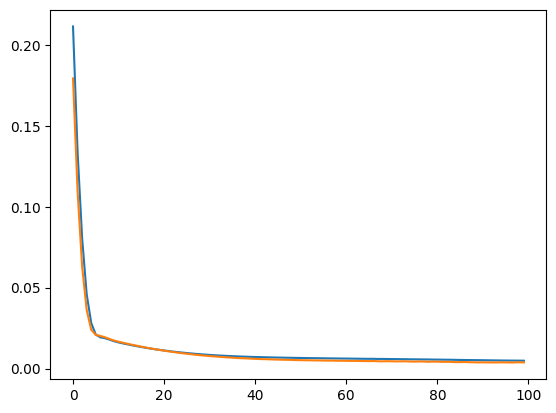

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])